In [24]:
# Dependencies
import numpy as np
import pandas as pd

from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt 

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [27]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [28]:
#  3. Convert the June temperatures to a list.
june_temp=session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [29]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns=['tobs'])
print(june_temp_df)

      tobs
0     78.0
1     76.0
2     78.0
3     76.0
4     77.0
...    ...
1695  79.0
1696  74.0
1697  74.0
1698  76.0
1699  75.0

[1700 rows x 1 columns]


In [30]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [31]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [32]:
# 7. Convert the December temperatures to a list.
dec_temp=session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [33]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp, columns=['tobs'])
print(dec_temp_df)

      tobs
0     76.0
1     74.0
2     74.0
3     64.0
4     64.0
...    ...
1512  71.0
1513  71.0
1514  69.0
1515  65.0
1516  65.0

[1517 rows x 1 columns]


In [34]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [35]:
#June Precipiation 
june_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()

In [48]:
#remove date
june_precip = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==6).all()


In [37]:
#create dataframe
june_precip_df=pd.DataFrame(june_precip, columns=['prcp'])
print(june_precip_df)

      prcp
0     0.00
1     0.01
2     0.00
3     0.00
4     0.00
...    ...
1695  0.02
1696  0.10
1697  0.02
1698  0.04
1699  0.20

[1700 rows x 1 columns]


Text(0.5, 1.0, 'June  Precipitation')

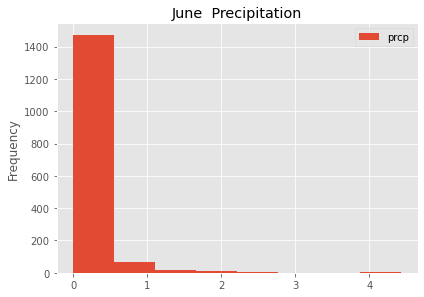

In [45]:
#graph june precip
june_precip_df.plot.hist(bins=8)
plt.tight_layout()
plt.title('June  Precipitation')


In [49]:
#Dec Precipiation 
dec_precip = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

In [50]:
#remove date
dec_precip = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

In [51]:
#create dataframe
dec_precip_df=pd.DataFrame(dec_precip, columns=['prcp'])
print(dec_precip_df)

      prcp
0     0.04
1     0.00
2     0.00
3     0.00
4     0.00
...    ...
1512  0.14
1513  0.14
1514  1.03
1515  2.37
1516  0.90

[1517 rows x 1 columns]


Text(0.5, 1.0, 'December Precipitation')

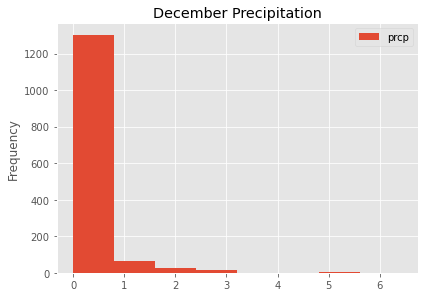

In [52]:
#graph june precip
dec_precip_df.plot.hist(bins=8)
plt.tight_layout()
plt.title('December Precipitation')
